In [6]:
#Initialization
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
using LinearAlgebra
using DifferentialEquations
using Plots

    Updating registry at `C:\Users\batti\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\batti\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\batti\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\batti\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\batti\.julia\environments\v1.8\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\batti\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\batti\.julia\environments\v1.8\Manifest.toml`

# Numerically Solving the 2-body Problem

## Scope: 
Here, we want to numerically integrate the two-body problem using orbital elements.

## Strategy:
 -We'll start by making a function that will get the initial conditions from the parameters. We'll be using the relative coordinates 
 
 -then a program that takes orbital elements and converts them to initial conditions to use in our integrator.

## Initial Values
In the relative coordinates, we can set 

In [2]:
m1 = 1.0
m2 = 1.0
e = 0.59
a=7
G=1
M = G*(m1+m2)
μ = m1*m2/M

function InitialValues(a,e,M,μ)
    x0 = a*(1-e)
    y0 = 0
    vx0 = 0
    vy0 = μ*sqrt(G*M *a *(1-e^2))/x0
    return [x0,y0,vx0,vy0]
end

InitialValues (generic function with 1 method)

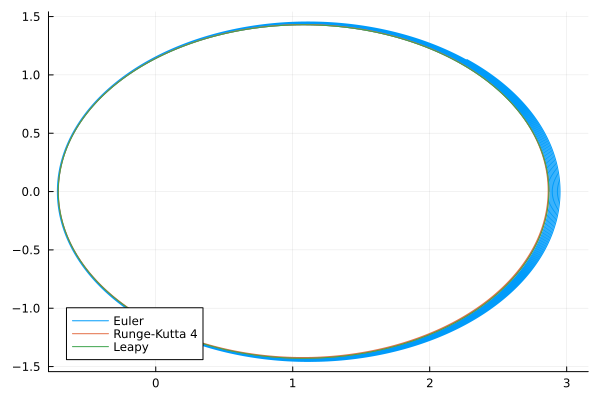

In [11]:
function coulomb!(dr,r,p,t)
    r,v = r[1:2],r[3:4]
    dr[1:2] = v #dr/dt = v
    dr[3:4] = -p[1]/norm(r)^3 * r 
end 

problem = ODEProblem(coulomb!,InitialValues(a,e,M,μ),(0,100),[M])#This defines our problem as a first order ODE 
euler = solve(problem, dt=1E-4,Euler())
rk4 = solve(problem, RK4())
#Now, as an interlude, we need to implemente a leapfrog scheme, as instructed in the problem. Our function there won't work, because the strategy was splitting our second order ODE into
#a system of first order ODEs. We will now define the function for the leap:
CoulombLeapy(dr,r,p,t) = -p[1]/norm(r)^3 * r[1:2]
problemleapy = SecondOrderODEProblem(CoulombLeapy,InitialValues(a,e,M,μ)[3:4],InitialValues(a,e,M,μ)[1:2],(0,100),[M])
Leapy = solve(problemleapy,dt=1E-3,VerletLeapfrog())
plot(euler,vars=(1,2),label="Euler")
plot!(rk4, vars=(1,2),label="Runge-Kutta 4")
plot!(Leapy,vars=(3,4),label="Leapy")